# COVID 19 PREDICTION

 <h3> import libraries </h3>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
covid_df = pd.read_csv('COVID-19.csv',error_bad_lines=False)

In [98]:
covid_df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,5/3/2020,3,5,2020,134,4,Afghanistan,AF,AFG,37172386.0,Asia
1,5/2/2020,2,5,2020,164,4,Afghanistan,AF,AFG,37172386.0,Asia
2,5/1/2020,1,5,2020,222,4,Afghanistan,AF,AFG,37172386.0,Asia
3,4/30/2020,30,4,2020,122,0,Afghanistan,AF,AFG,37172386.0,Asia
4,4/29/2020,29,4,2020,124,3,Afghanistan,AF,AFG,37172386.0,Asia


In [99]:
covid_df.shape

(14659, 11)

<h3> Data Processing </h3>

In [100]:
covid_df = covid_df.drop(['day','month','year','geoId','countryterritoryCode','popData2018'],axis=1)

In [101]:
covid_df.head()

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,5/3/2020,134,4,Afghanistan,Asia
1,5/2/2020,164,4,Afghanistan,Asia
2,5/1/2020,222,4,Afghanistan,Asia
3,4/30/2020,122,0,Afghanistan,Asia
4,4/29/2020,124,3,Afghanistan,Asia


In [102]:
# Changing the format of the Date
covid_df.dateRep = pd.to_datetime(covid_df.dateRep,format='%m/%d/%Y')

In [103]:
covid_df.head()

,dateRep,cases,deaths,countriesAndTerritories,continentExp
0,2020-05-03,134,4,Afghanistan,Asia
1,2020-05-02,164,4,Afghanistan,Asia
2,2020-05-01,222,4,Afghanistan,Asia
3,2020-04-30,122,0,Afghanistan,Asia
4,2020-04-29,124,3,Afghanistan,Asia


In [104]:
def filtering_pro(country):
    booleans = []
    for results in covid_df.countriesAndTerritories:
        if(results == country):
            booleans.append(True)
        else:
            booleans.append(False)
    filter_cty = pd.Series(booleans)
    covid_cty = covid_df[filter_cty]
    print(covid_cty.shape)
    return covid_cty

In [111]:
covid_FR = filtering_pro(country='France')
covid_BLG = filtering_pro(country='Belgium')
covid_UK = filtering_pro(country='United_Kingdom')
covid_ITL = filtering_pro(country='Italy')
covid_GRM = filtering_pro(country='Germany')

(125, 5)
(125, 5)
(125, 5)
(125, 5)
(125, 5)


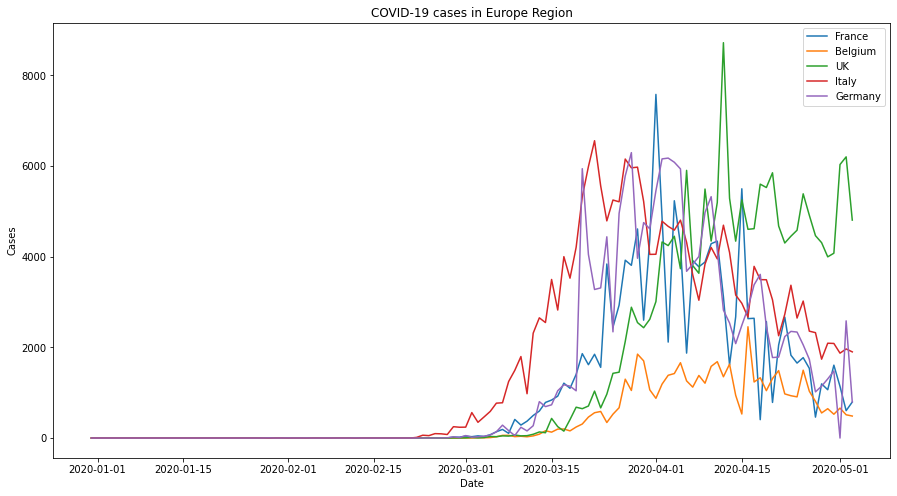

In [112]:
X= covid_FR['dateRep']
Y1 = covid_FR['cases']
Y2 = covid_BLG['cases']
Y3 = covid_UK['cases']
Y4 = covid_ITL['cases']
Y5 = covid_GRM['cases']
pd.plotting.register_matplotlib_converters()
plt.figure(figsize=(15,8))
plt.plot(X,Y1)
plt.plot(X,Y2)
plt.plot(X,Y3)
plt.plot(X,Y4)
plt.plot(X,Y5)
plt.title('COVID-19 cases in Europe Region')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend(['France','Belgium','UK','Italy','Germany'])